In [88]:
# Importing Libraries
import numpy as np # used for numeric calculations
import pandas as pd # used for data analysis and manipulation
import matplotlib.pyplot as plt # used for data visualization
import seaborn as sns 
from dateutil  import parser # used for converting time into date time datatype
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [25]:
# importing dataset
Finance_Data = pd.read_csv("B:\FineTech_appData.csv")

In [26]:
features = Finance_Data.columns
for i in features:
    print("""Unique value = {}\n{}\nTotal Length = {} \n........................\n
          """.format(i, Finance_Data[i].unique(), len(Finance_Data[i].unique())))

Unique value = user
[235136 333588 254414 ... 302367 324905  27047]
Total Length = 49874 
........................

          
Unique value = first_open
['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638']
Total Length = 49747 
........................

          
Unique value = dayofweek
[3 6 1 4 2 0 5]
Total Length = 7 
........................

          
Unique value = hour
[' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00']
Total Length = 24 
........................

          
Unique value = age
[ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  47  1

In [27]:
#reading first 5 rows of dataset
Finance_Data.head(5)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [29]:
# reading the data types of features
Finance_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null object
dayofweek               50000 non-null int64
hour                    50000 non-null object
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
liked                   50000 non-null int64
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [36]:
# analyzing the data for null values
Finance_Data.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [38]:
Finance_Data.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [40]:
# for data visualizing we need numeric data type.
# creating another variable to store numeric values
Finance_Data2 = Finance_Data.drop(['user', 'first_open', 'screen_list', 'enrolled_date'], axis = 1)

In [41]:
# reading another numeric varibale
Finance_Data2.head(5)

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1


Text(0.5, 1, 'Heatmap using correlation matrix of Finance_Data2')

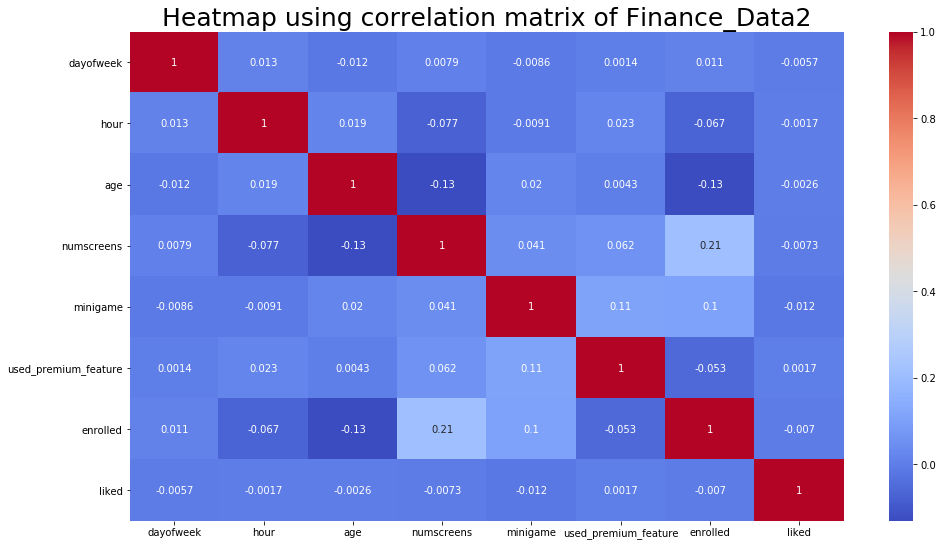

In [42]:
# Data Visualization by HeatMap
plt.figure(figsize=(16,9)) # heatmap size - ratio 16:9
 
sns.heatmap(Finance_Data2.corr(), annot = True, cmap ='coolwarm') # show heatmap
 
plt.title("Heatmap using correlation matrix of Finance_Data2", fontsize = 25) # title of heatmap

C:\Users\97155\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\97155\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


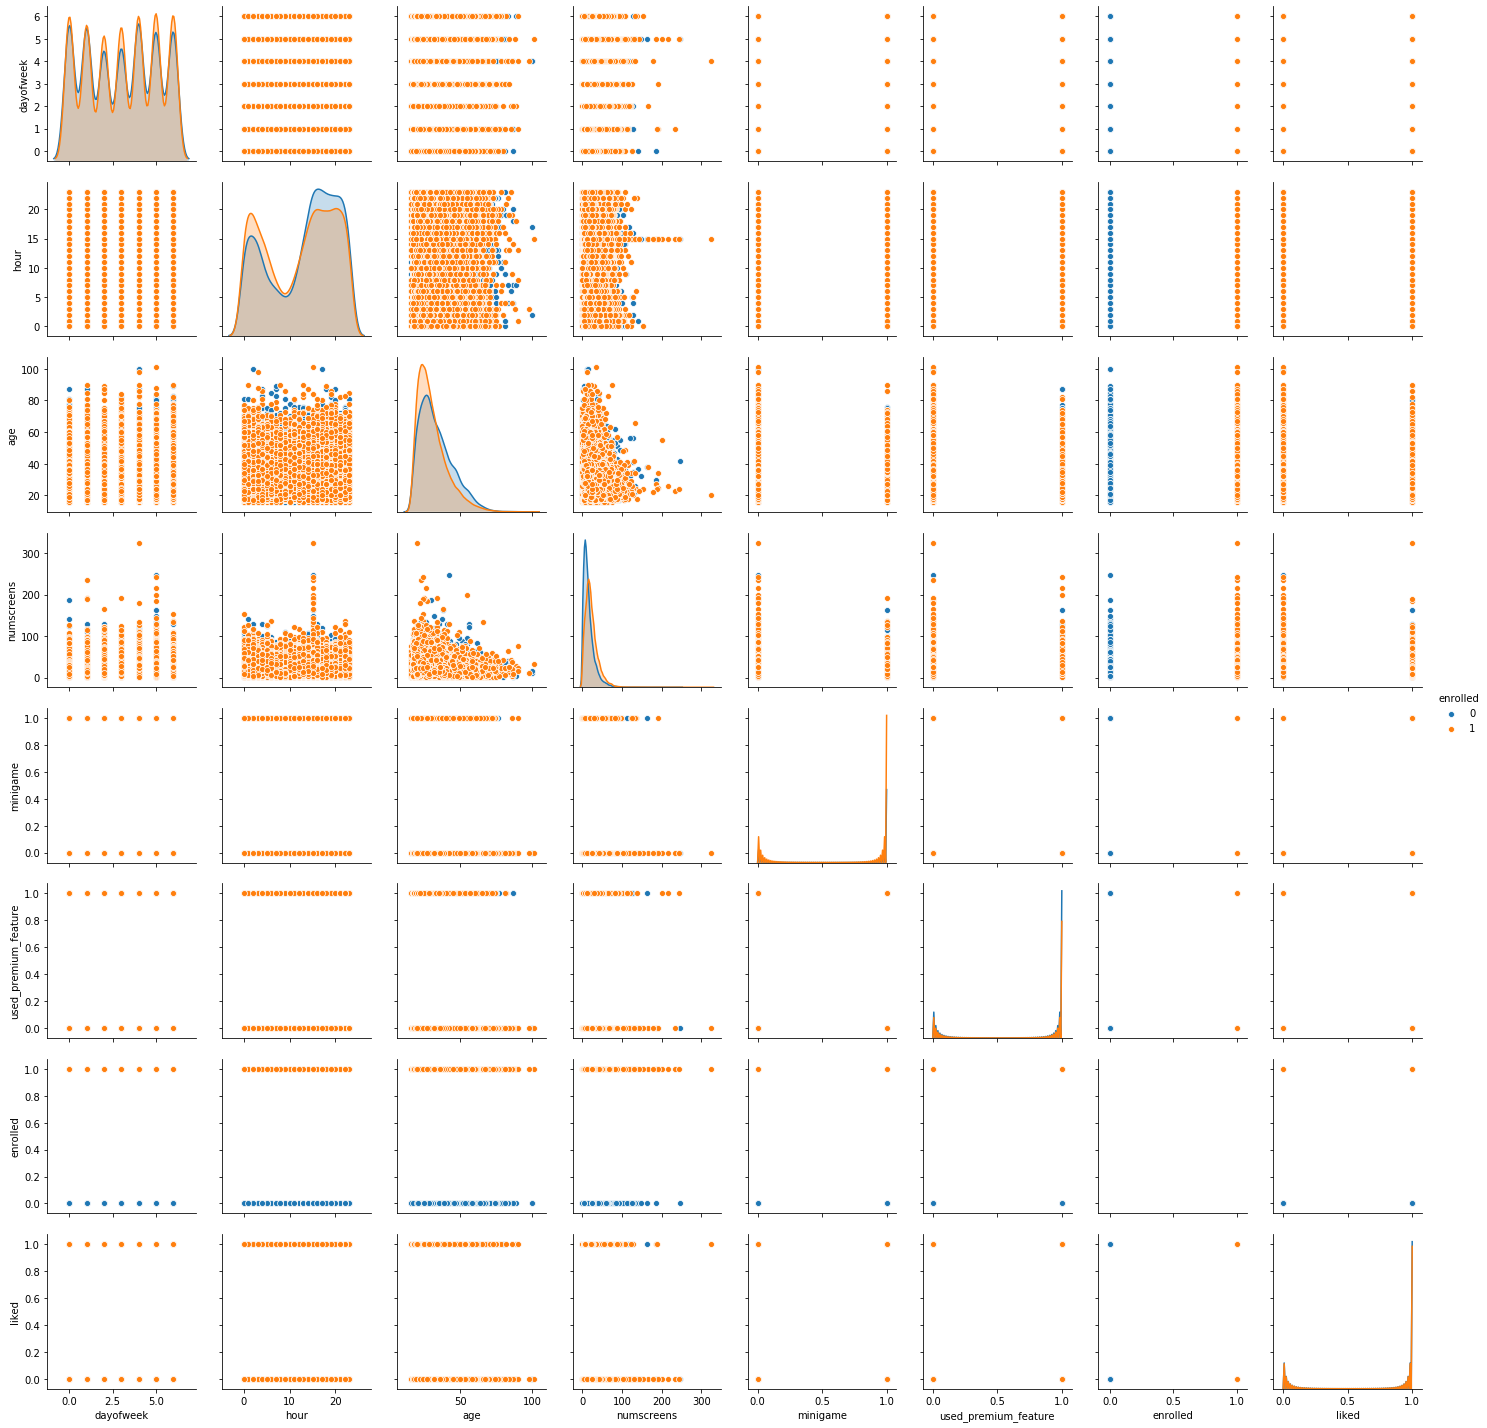

In [43]:
# Data Visualization by Pairplot
sns.pairplot(Finance_Data2, hue = 'enrolled')

User Enrolled =  31074
User Not Enrolled =  18926


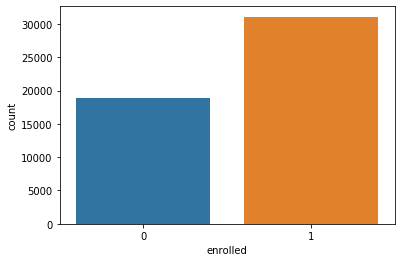

In [49]:
print("User Enrolled = ", 50000 - (Finance_Data2.enrolled < 1).sum())
sns.countplot(Finance_Data2.enrolled)
print("User Not Enrolled = ",(Finance_Data2.enrolled < 1).sum())


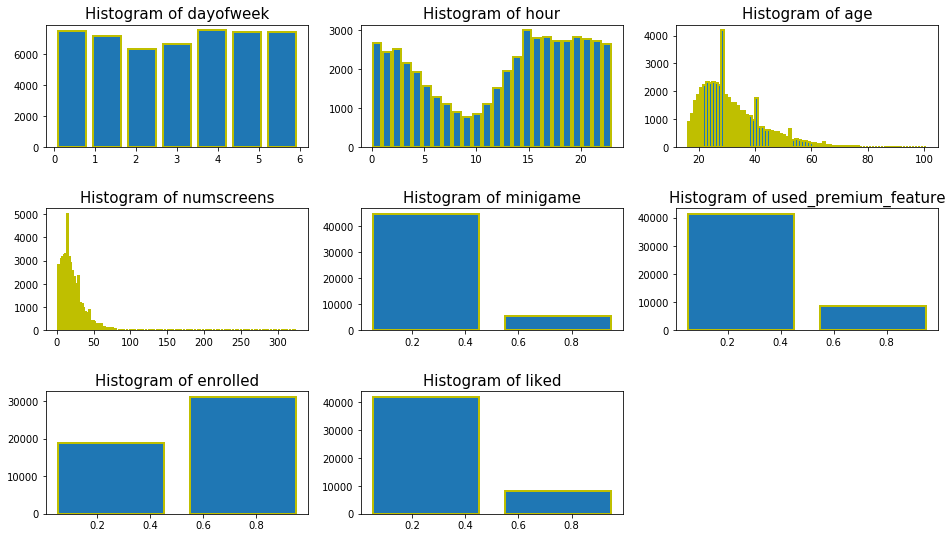

In [52]:
# Data Visualization via Histogram
plt.figure(figsize=(16,9)) # figure size - ratio 16:9
features = Finance_Data2.columns
for i,j in enumerate(features):
    plt.subplot(3,3,i+1) # creating subplot for histogram
    plt.title("Histogram of {}".format(j), fontsize = 15) # title of histogram
    
    bins = len(Finance_Data2[j].unique()) # bins of histogram
    plt.hist(Finance_Data2[j],bins = bins, rwidth = 0.8, edgecolor = "y", linewidth = 2, ) # plot histogram

plt.subplots_adjust(hspace=0.5)

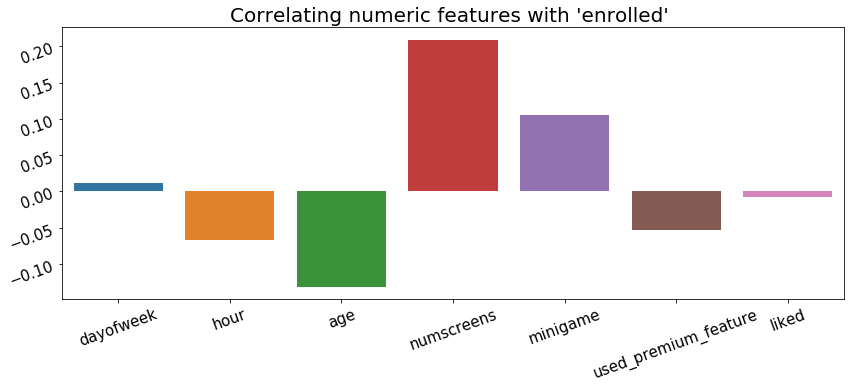

In [53]:
# Data Visualization via Bar Plot
sns.set # set background dark grid
plt.figure(figsize = (14,5))
plt.title("Correlating numeric features with 'enrolled' ", fontsize = 20)
Finance_Data3 = Finance_Data2.drop(['enrolled'], axis = 1)
ax = sns.barplot(Finance_Data3.columns, Finance_Data3. corrwith(Finance_Data.enrolled))
ax.tick_params(labelsize = 15, labelrotation = 20, color = "k")

In [54]:
Finance_Data['first_open'] =[parser.parse(i) for i in Finance_Data['first_open']]
 
Finance_Data['enrolled_date'] =[parser.parse(i) if isinstance(i, str) else i for i in Finance_Data['enrolled_date']]
 
Finance_Data.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

(array([2.8195e+04, 1.0320e+03, 5.6700e+02, 4.2500e+02, 2.8800e+02,
        1.7900e+02, 1.6500e+02, 9.7000e+01, 1.0400e+02, 2.2000e+01]),
 array([   0. ,  543.4, 1086.8, 1630.2, 2173.6, 2717. , 3260.4, 3803.8,
        4347.2, 4890.6, 5434. ]),
 <a list of 10 Patch objects>)

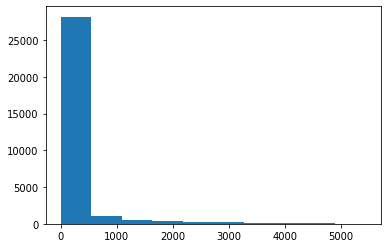

In [55]:
Finance_Data['time_to_enrolled']  = (Finance_Data.enrolled_date - Finance_Data.first_open).astype('timedelta64[h]')
plt.hist(Finance_Data['time_to_enrolled'].dropna())

(array([22793.,   755.,   707.,   288.,   347.,   210.,   187.,   212.,
          135.,   194.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

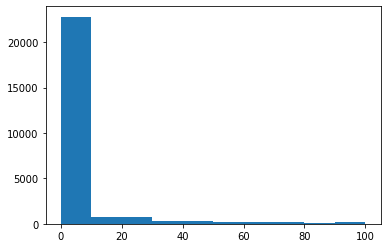

In [56]:
plt.hist(Finance_Data['time_to_enrolled'].dropna(), range = (0,100)) 

In [57]:
# Feature Selection
Finance_Data3 = pd.read_csv("top_screens.csv").top_screens.values
 
Finance_Data3

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [58]:
Finance_Data['screen_list'] = Finance_Data.screen_list.astype(str) + ','

In [59]:
# string into to number
 
for screen_name in Finance_Data3:
    Finance_Data[screen_name] = Finance_Data.screen_list.str.contains(screen_name).astype(int)
    Finance_Data['screen_list'] = Finance_Data.screen_list.str.replace(screen_name+",", "")

In [60]:
Finance_Data.shape

(50000, 71)

In [61]:
# remain screen in 'screen_list'
Finance_Data.loc[0,'screen_list']

'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,'

In [62]:
# count remain screen list and store counted number in 'remain_screen_list'
 
Finance_Data['remain_screen_list'] = Finance_Data.screen_list.str.count(",")

In [63]:
# Drop the 'screen_list'
Finance_Data.drop(columns = ['screen_list'], inplace=True)

In [64]:
Finance_Data.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'numscreens',
       'minigame', 'used_premium_feature', 'enrolled', 'enrolled_date',
       'liked', 'time_to_enrolled', 'Loan2', 'location', 'Institutions',
       'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLengt

In [65]:
# taking sum of all saving screen in one place
saving_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10',
                 ]
Finance_Data['saving_screens_count'] = Finance_Data[saving_screens].sum(axis = 1)
Finance_Data.drop(columns = saving_screens, inplace = True)

In [66]:
# taking sum of all credit screen in one place
credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
                 ]
Finance_Data['credit_screens_count'] = Finance_Data[credit_screens].sum(axis = 1)
Finance_Data.drop(columns = credit_screens, axis = 1, inplace = True)

In [67]:
# taking sum of all cc screen in one place
cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ]
Finance_Data['cc_screens_count'] = Finance_Data[cc_screens].sum(axis = 1)
Finance_Data.drop(columns = cc_screens, inplace = True)

In [68]:
# taking sum of all Loan screen in one place
loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4',
               ]
Finance_Data['loan_screens_count'] = Finance_Data[loan_screens].sum(axis = 1)
Finance_Data.drop(columns = loan_screens, inplace = True)

In [69]:
Finance_Data.shape

(50000, 53)

In [70]:
Finance_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 53 columns):
user                       50000 non-null int64
first_open                 50000 non-null datetime64[ns]
dayofweek                  50000 non-null int64
hour                       50000 non-null int32
age                        50000 non-null int64
numscreens                 50000 non-null int64
minigame                   50000 non-null int64
used_premium_feature       50000 non-null int64
enrolled                   50000 non-null int64
enrolled_date              31074 non-null datetime64[ns]
liked                      50000 non-null int64
time_to_enrolled           31074 non-null float64
location                   50000 non-null int32
Institutions               50000 non-null int32
VerifyPhone                50000 non-null int32
BankVerification           50000 non-null int32
VerifyDateOfBirth          50000 non-null int32
ProfilePage                50000 non-null int32
VerifyC

In [71]:
# Drop the 'screen_list'
Finance_Data.drop(columns = ['first_open'], inplace=True)

In [73]:
Finance_Data.drop(columns = ['enrolled_date'], inplace=True)

In [74]:
Finance_Data.drop(columns = ['time_to_enrolled'], inplace=True)

In [75]:
Finance_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
user                       50000 non-null int64
dayofweek                  50000 non-null int64
hour                       50000 non-null int32
age                        50000 non-null int64
numscreens                 50000 non-null int64
minigame                   50000 non-null int64
used_premium_feature       50000 non-null int64
enrolled                   50000 non-null int64
liked                      50000 non-null int64
location                   50000 non-null int32
Institutions               50000 non-null int32
VerifyPhone                50000 non-null int32
BankVerification           50000 non-null int32
VerifyDateOfBirth          50000 non-null int32
ProfilePage                50000 non-null int32
VerifyCountry              50000 non-null int32
Cycle                      50000 non-null int32
idscreen                   50000 non-null int32
Splash                     

In [107]:
traget = Finance_Data['enrolled']
Finance_Data.drop(columns = 'enrolled', inplace = True)

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Finance_Data, traget, test_size = 0.2, random_state = 0)

print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (40000, 49)
Shape of X_test =  (10000, 49)
Shape of y_train =  (40000,)
Shape of y_test =  (10000,)


In [85]:
# take User ID in another variable 
train_userID = X_train['user']
X_train.drop(columns= 'user', inplace =True)
test_userID = X_test['user']
X_test.drop(columns= 'user', inplace =True)

C:\Users\97155\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [86]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of train_userID = ', train_userID.shape)
print('Shape of test_userID = ', test_userID.shape)

Shape of X_train =  (40000, 48)
Shape of X_test =  (10000, 48)
Shape of train_userID =  (40000,)
Shape of test_userID =  (10000,)


In [87]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [89]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.7154

In [90]:
# K- Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
 
accuracy_score(y_test, y_pred_knn)

0.6925

In [91]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
 
accuracy_score(y_test, y_pred_nb)

0.7001

In [92]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
 
accuracy_score(y_test, y_pred_rf)

0.7575

In [93]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 0, penalty = 'l1')
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
 
accuracy_score(y_test, y_pred_lr)

C:\Users\97155\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7502

In [94]:
# Support Vector Machine
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
 
accuracy_score(y_test, y_pred_svc)

C:\Users\97155\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7523

In [95]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

C:\Users\97155\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:06:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7828

In [99]:
# Among all classifiers, XGBoost ML Model gave better results 

Text(0.5, 1, 'Confussion Matrix')

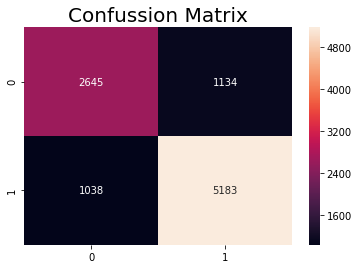

In [101]:
# confussion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 20) 

In [102]:
# Clasification Report
cr_xgb = classification_report(y_test, y_pred_xgb)
 
print("Classification report >>> \n", cr_xgb)

Classification report >>> 
               precision    recall  f1-score   support

           0       0.72      0.70      0.71      3779
           1       0.82      0.83      0.83      6221

    accuracy                           0.78     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.78      0.78      0.78     10000



In [104]:
# Cross validation
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = xgb_model, X = X_train_sc, y = y_train, cv = 10)
print("Cross validation of XGBoost model = ",cross_validation)
print("Cross validation of XGBoost model (in mean) = ",cross_validation.mean())

C:\Users\97155\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:11:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [103]:
final_result = pd.concat([test_userID, y_test], axis = 1)
final_result['predicted result'] = y_pred_xgb
 
print(final_result)

         user  enrolled  predicted result
11841  239786         1                 1
19602  279644         1                 1
45519   98290         0                 0
25747  170150         1                 1
42642  237568         1                 0
31902   65042         1                 0
30346  207226         1                 1
12363  363062         0                 0
32490  152296         1                 1
26128   64484         0                 0
14227   38108         1                 1
26376  359940         0                 0
44173  136089         0                 0
12968   14231         1                 1
32104  216038         0                 0
17844   18918         1                 1
43460  316730         1                 1
8369    28308         1                 0
15055  228387         1                 1
6338    69640         1                 1
15301  358264         0                 1
46250  348059         1                 1
45580  178743         1           